In [6]:
from tweepy import OAuthHandler
from tweepy import Stream
from textblob import TextBlob
import tweepy
import re
import pandas as pd 
from sklearn.feature_extraction.text import TfidfVectorizer

In [2]:
## Authorization credentials to use Twitter's Api
consumer_key = "xxxxxxxxxxxxxx"  ##API KEY
consumer_secret = "xxxxxxxxxxxx" ##API SECRET KEY
access_token ="xxxxxxxxxxxxxx"
access_token_secret = "xxxxxxxxxxxxxx"

## in the picture above it is described


auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [3]:
# define the target words to scrape

search_words = 'Elon Musk'
begin_date = '2022-10-01'

# collect tweets

Elon = tweepy.Cursor(api.search_tweets, q=search_words, lang='en').items(100)

# store the tweets into a list
Elon_tweets = [[tweet.text, tweet.user.location, tweet.retweet_count] for tweet in Elon]

In [4]:
Elon_tweets

[['RT @Sputnik_Not: BREAKING: Putin awards Elon Musk rank of colonel https://t.co/BrXff54HB7',
  '',
  3356],
 ['RT @matthewstoller: Elon Musk forced everyone in his factories back to work over Covid but can\'t do a deposition in his trial due to "conce…',
  '',
  134],
 ['@elonmusk @spideycyp_155 @garyblack00 Elon Musk::: SuperHERO to the Humanitiessssssss🛼🛼🛼🇺🇸  Thank you☺️',
  '',
  0],
 ['@colbertlateshow Elon Musk served, briefly, as human.', 'Iowa, USA', 0],
 ['We just had a Hu Xijin-Elon Musk crossover https://t.co/KWo3LSPdOa', '', 0],
 ['RT @LindseyGrahamSC: To do otherwise is to legitimize a bait and switch by Russia and a signal to other bad actors to take what you want -…',
  '',
  381],
 ["RT @EndGameWW3: Lindsey Graham Locks Horns With Elon Musk, Calls His Plan for Russia-Ukraine Conflict ‘Dumb': ‘He Needs to Understand the F…",
  'Ontario, Canada',
  18],
 ['Who needs Hollywood to keep us entertained when we have Elon Musk😂\n$TSLA $TWTR https://t.co/PT648VGtxi',
  'sometim

In [8]:
# creating a DataFrame

df = pd.DataFrame(data=Elon_tweets, columns=['Tweets','Location','retweet_count'])

# cleaning DataFrame with function

def cleanText(text):
    text = re.sub(r"(?:\@|https?\://)\S+",'', text)#removing hiperlink and @ mentions
    text = re.sub(r'RT[\s]+', ' ', text) # Removing Retweets
    text = re.sub(r'#', ' ', text) #Removing hastags
    return text

# applying cleaning function

df['Tweets'] = df['Tweets'].apply(cleanText)

df.head()

,Tweets,Location,retweet_count
0,BREAKING: Putin awards Elon Musk rank of colo...,,3356
1,Elon Musk forced everyone in his factories ba...,,134
2,Elon Musk::: SuperHERO to the Humanitiessss...,,0
3,"Elon Musk served, briefly, as human.","Iowa, USA",0
4,We just had a Hu Xijin-Elon Musk crossover,,0


In [9]:
# save the file as csv.file

df.to_csv(r'C:/Users/tony3/Projects/Elon_Tweets.csv', index= False)

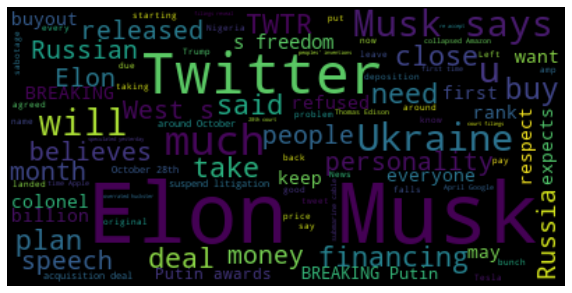

In [14]:
# import packages for data visualization

from wordcloud import WordCloud, STOPWORDS
from nltk.corpus import stopwords 
import matplotlib.pyplot as plt

allWords = ' '.join([tweets for tweets in df['Tweets']])

wordCloud = WordCloud(background_color='black', max_words = 100)
wordCloud.generate(allWords)

# display the word cloud
fig = plt.figure()
fig.set_figwidth(10)
fig.set_figheight(10)
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()